# Homework 3 (Dev Mody)
## Exercise 5 (3-Class Classification)

In this exercise we will use the 3-class toy data set `3class_data.csv` shown in Fig. 7.9. We shall try to reproduce the data in that figure using the multi-class Perceptron. The implementation of the L2 regularized multiclass perceptron is discussed in the book

```python
lam = 10**-5 # our regularization paramter
def multiclass_perceptron(w):
    # pre-compute predictions on all points
    all_evals = model(x,w)
    # compute maximum across data points
    a = np.max(all_evals,axis = 0)
    # compute cost in compact form using numpy broadcasting
    b = all_evals[y.astype(int).flatten(),np.arange(np.size(y))]
    cost = np.sum(a - b)
    # add regularizer
    cost = cost + lam*np.linalg.norm(w[1:,:],’fro’)**2
    # return average
    return cost/float(np.size(y)
```
Note that in this case we do not strictly enforce $||w||^2 = 1$. Instead, we have relaxed this constraint by instead including a regularizer.

### Exercise 5.1 (Implementation + Experiment)
Use the multi-class perceptron cost function to fit a model using gradient descent with `max_its=1000`, and a random starting vector `w = 0.1*np.random.randn(3,3)` and `alpha =0.1`. Plot the cost function history versus the number of iterations. Can you achieve as good a classification as shown in Fig. 7.9 in the book ?

ANSWER: The Implementation + Experiment is as follows:

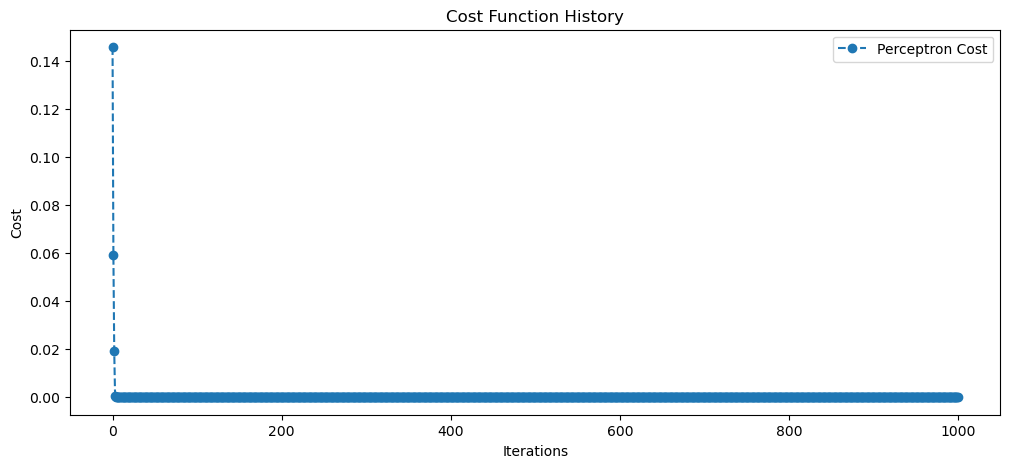

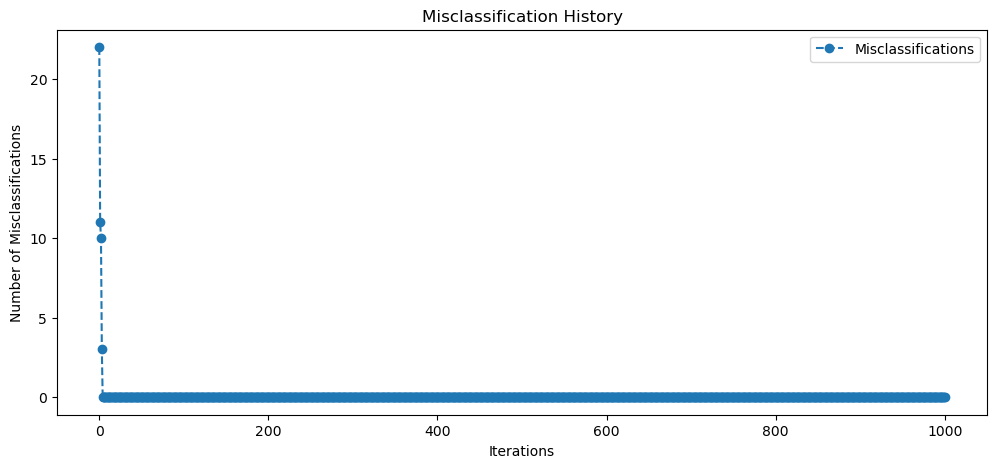

Minimum Misclassifications: 0
Accuracy: 100.00%


In [17]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt

# Model definition: bias term is in w[0] and weights in w[1:]
def model(x, w):
    a = w[0] + np.dot(x.T, w[1:])
    return a.T  

# Multiclass perceptron cost function using normalized features
def multiclass_perceptron(w):
    lam = 10**-5  # regularization parameter
    # Use normalized data (x_norm) for cost computation
    all_evals = model(x_norm, w)
    # Compute maximum over classes for each sample
    a = np.max(all_evals, axis=0)
    # Gather scores corresponding to the true class labels
    b = all_evals[y.astype(int).flatten(), np.arange(np.size(y))]
    cost = np.sum(a - b)
    # Add regularizer (using 'fro' for Frobenius norm)
    cost = cost + lam * np.linalg.norm(w[1:, :], 'fro')**2
    return cost / float(np.size(y))

# Gradient descent implementation
def standard_gradient_descent(g, alpha, max_its, w):
    gradient = grad(g)
    weight_history = [w]
    cost_history = [g(w)]
    for _ in range(max_its):
        w = w - alpha * gradient(w)
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history, cost_history

# Standard normalization function
def standard_normalizer(x):
    x_means = np.nanmean(x, axis=1)[:, np.newaxis]
    x_stds = np.nanstd(x, axis=1)[:, np.newaxis]
    # Avoid division by small stds
    ind = np.argwhere(x_stds < 10**(-2))
    if len(ind) > 0:
        ind = [v[0] for v in ind]
        adjust = np.zeros(x_stds.shape)
        adjust[ind] = 1.0
        x_stds += adjust
        # Replace NaNs with means if any
        ind_nan = np.argwhere(np.isnan(x))
        for i, j in ind_nan:
            x[i, j] = x_means[i]
    normalizer = lambda data: (data - x_means) / x_stds
    inverse_normalizer = lambda data: data * x_stds + x_means
    return normalizer, inverse_normalizer

# Misclassification count function using normalized data
def miscount(w, x_norm, y):
    predictions = np.argmax(model(x_norm, w), axis=0) 
    misclassified = predictions != y.astype(int)
    return np.sum(misclassified)

# Load data (ensure the file path is correct)
data = np.loadtxt('/Users/devmody/Documents/Courses/3ml3/homeworks/homework3/3class_data.csv', delimiter=',')
x = data[:-1, :] 
y = data[-1:, :] 

# Normalize the features
normalizer, _ = standard_normalizer(x)
x_norm = normalizer(x)

# Initialize parameters and run gradient descent
w = 0.1 * np.random.randn(3, 3)
alpha = 0.1
max_its = 1000
weight_history, cost_history = standard_gradient_descent(g=multiclass_perceptron, alpha=alpha, max_its=max_its, w=w)

# Compute misclassifications using normalized features
miscounts = [miscount(w, x_norm, y) for w in weight_history]
iterations = np.arange(len(cost_history))

# Plot cost function history
plt.figure(figsize=(12, 5))
plt.plot(iterations, cost_history, label="Perceptron Cost", linestyle='--', marker='o')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function History")
plt.legend()
plt.show()

# Plot misclassification history with updated title
plt.figure(figsize=(12, 5))
plt.plot(iterations, miscounts, label="Misclassifications", linestyle='--', marker='o')
plt.xlabel("Iterations")
plt.ylabel("Number of Misclassifications")
plt.title("Misclassification History")
plt.legend()
plt.show()

# Calculate accuracy based on minimum misclassifications encountered during training
min_miscount = min(miscounts)
total_samples = y.size
accuracy = (total_samples - min_miscount) / total_samples

print(f"Minimum Misclassifications: {min_miscount}")
print(f"Accuracy: {accuracy * 100:.2f}%")


### Exercise 5.2: Data Plotting:

Plot the data in the plane along with the decision boundaries. You should get something similar but not idetical to what is in the book by Watt et al. 6

ANSWER: As seen below, I was able to plot something similar to the example from the book

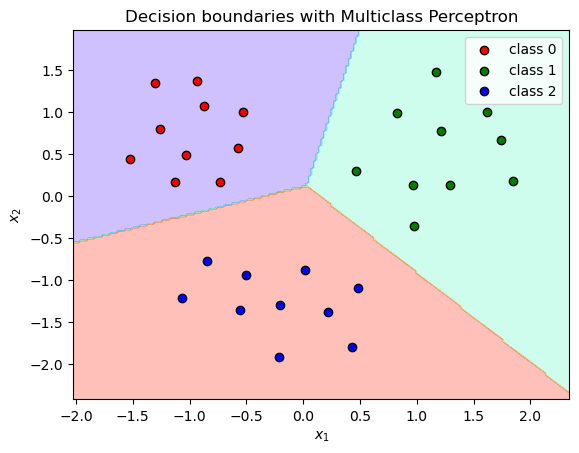

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the best weights
best_w = weight_history[-1]

# Define a grid
x1_min, x1_max = np.min(x_norm[0, :]) - 0.5, np.max(x_norm[0, :]) + 0.5
x2_min, x2_max = np.min(x_norm[1, :]) - 0.5, np.max(x_norm[1, :]) + 0.5
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                       np.linspace(x2_min, x2_max, 200))
grid_points = np.vstack([xx1.ravel(), xx2.ravel()])  # shape (2, 200*200)

# Evaluate model => shape (3, 40000)
scores = model(grid_points, best_w)
# Pick argmax along axis=0 => shape (40000,)
class_map = np.argmax(scores, axis=0)

# Reshape for contour
class_map = class_map.reshape(xx1.shape)

# Color-plot the regions
plt.contourf(xx1, xx2, class_map, alpha=0.3, cmap=plt.cm.rainbow)

# Then plot original data
colors = ['r', 'g', 'b']
y_data = y.flatten()  # shape (P,)
for c in range(3):
    pts = np.where(y_data == c)
    plt.scatter(x_norm[0, pts], x_norm[1, pts], c=colors[c], edgecolors='k', label='class ' + str(c))

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Decision boundaries with Multiclass Perceptron')
plt.legend()
plt.show()